# Some Additional Help for Assignment 2

We start by importing the libraries we need and loading the assignment training data.

In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Below, we are using the small dataset just to make things a bit faster.
images, face_ids = joblib.load('data/train.small.joblib')
print(images.shape)

(2500, 125, 94)


## Making the training data sub-images

There are a couple of different approaches that can be used. Either,

- Write a function to extract a sub-image from an image
- Use the PatchExtractor class from scikit-learn

In [3]:
def random_sub_image(images, n_pixels):
    face_index = np.random.randint(0, len(images))
    image = images[face_index]
    valid_x = image.shape[0] - n_pixels
    valid_y = image.shape[1] - n_pixels
    x = np.random.randint(0, valid_x)
    y = np.random.randint(0, valid_y)
    sub_image = image[x:x+n_pixels, y:y+n_pixels]
    return sub_image


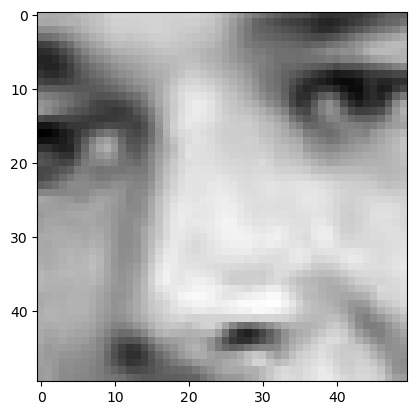

In [6]:
plt.imshow(random_sub_image(images, 50), cmap='gray')

Alternatively, you can use the `image` module from `sklearn.feature_extraction`.

In [16]:
from sklearn.feature_extraction import image

patch_extractor = image.PatchExtractor(patch_size=(50, 50), max_patches=2, random_state=0)

sub_images = patch_extractor.transform(images)

print(sub_images.shape)

(5000, 50, 50)


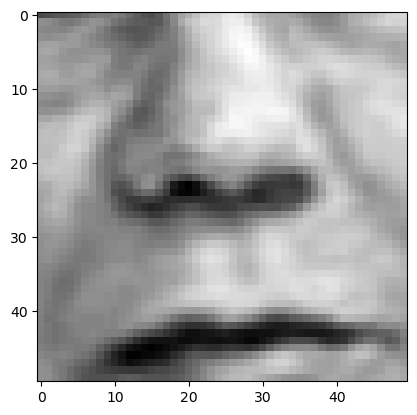

In [8]:
random_index = np.random.randint(0, len(sub_images))
plt.imshow(sub_images[random_index], cmap='gray')


## Rotation

Rotating images by multiples of 90 degrees can be done easily with `numpy.rot90`.

In [9]:
random_index = np.random.randint(0, len(sub_images))
sub_image = sub_images[random_index]


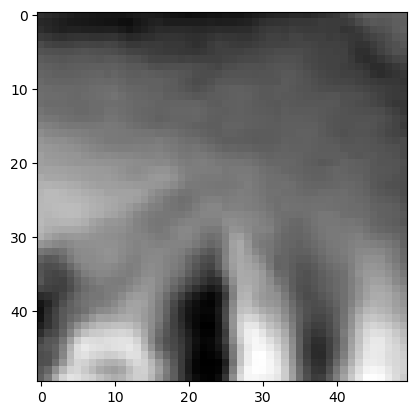

In [14]:
sub_image = np.rot90(sub_image, k=1)
plt.imshow(sub_image, cmap='gray')

## Reshaping from images to feature vectors

The classifier will need the image to be represented as a vector. We can use the `reshape` method to do this.

In [61]:
features = sub_image.reshape(-1)   
print(sub_image.shape) 
print(features.shape)

(50, 50)
(2500,)


In [60]:
all_features = sub_images.reshape(len(sub_images), -1)
print(sub_images.shape)
print(all_features.shape)


(5000, 50, 50)
(5000, 2500)


In [83]:
patch_no = 3
for p in [30,50,90]:
    if p == 30:
        patch_extractor = image.PatchExtractor(patch_size=(p, p), max_patches=patch_no, random_state=0)
        sub_images1 = patch_extractor.transform(images)
        j = 0
        sub_images30 = sub_images1.copy()
        y_train_30 = []
        for i in range(len(sub_images30)):
            if j == 0:
                sub_images30[i] = np.rot90(sub_images30[i], k=j)
                y_train_30.append(j)
                j += 1
            elif j == 1:
                sub_images30[i] = np.rot90(sub_images30[i], k=j)
                y_train_30.append(j)
                j += 1
            elif j == 2:
                sub_images30[i] = np.rot90(sub_images30[i], k=j)
                y_train_30.append(j)
                j += 1
            elif j == 3:
                sub_images30[i] = np.rot90(sub_images30[i], k=j)
                y_train_30.append(j)
                j = 0
    
    elif p == 50:
        patch_extractor = image.PatchExtractor(patch_size=(p, p), max_patches=patch_no, random_state=0)
        sub_images2 = patch_extractor.transform(images)
        j = 0
        sub_images50 = sub_images2.copy()
        y_train_50 = []
        for i in range(len(sub_images30)):
            if j == 0:
                sub_images50[i] = np.rot90(sub_images50[i], k=j)
                y_train_50.append(j)
                j += 1
            elif j == 1:
                sub_images50[i] = np.rot90(sub_images50[i], k=j)
                y_train_50.append(j)
                j += 1
            elif j == 2:
                sub_images50[i] = np.rot90(sub_images50[i], k=j)
                y_train_50.append(j)
                j += 1
            elif j == 3:
                sub_images50[i] = np.rot90(sub_images50[i], k=j)
                y_train_50.append(j)
                j = 0
    
    elif p == 90:
        patch_extractor = image.PatchExtractor(patch_size=(p, p), max_patches=patch_no, random_state=0)
        sub_images3 = patch_extractor.transform(images)
        j = 0
        sub_images90 = sub_images3.copy()
        y_train_90 = []
        for i in range(len(sub_images30)):
            if j == 0:
                sub_images90[i] = np.rot90(sub_images90[i], k=j)
                y_train_90.append(j)
                j += 1
            elif j == 1:
                sub_images90[i] = np.rot90(sub_images90[i], k=j)
                y_train_90.append(j)
                j += 1
            elif j == 2:
                sub_images90[i] = np.rot90(sub_images90[i], k=j)
                y_train_90.append(j)
                j += 1
            elif j == 3:
                sub_images90[i] = np.rot90(sub_images90[i], k=j)
                y_train_90.append(j)
                j = 0

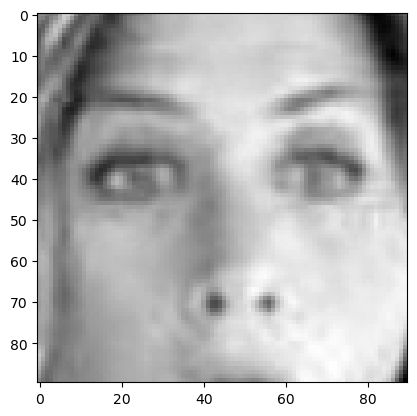

In [73]:
plt.imshow(sub_images3[5],cmap = 'gray')

In [84]:
train_data = {}
train_data[30] = { 'x_train':sub_images30,
                    'y_train': y_train_30}

train_data[50] = { 'x_train':sub_images50,
                    'y_train': y_train_50}

train_data[90] = { 'x_train':sub_images90,
                    'y_train': y_train_90}

In [85]:
import joblib
from sklearn.model_selection import GridSearchCV

data = joblib.load('eval1.joblib')

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from joblib import Memory
import tempfile

temp_dir_name = tempfile.mkdtemp()
cache = Memory(location=temp_dir_name, verbose=0)
pipeline = Pipeline([
    ('pca', PCA(n_components=30)),
    ('knn',KNeighborsClassifier(n_neighbors=1))
],memory = cache)

param_grid = {
    'knn__n_neighbors': range(1,26,2)
}

features_30 = train_data[30]['x_train'].reshape(len(sub_images30),-1)

grid_result = GridSearchCV(pipeline,param_grid=param_grid,cv=5,n_jobs=-1)

grid_result.fit(features_30,train_data[30]['y_train'])


GridSearchCV(cv=5,
             estimator=Pipeline(memory=Memory(location=C:\Users\adhir\AppData\Local\Temp\tmpvkhve8u1\joblib),
                                steps=[('pca', PCA(n_components=30)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 26, 2)})

In [99]:
grid_result.best_estimator_

Pipeline(memory=Memory(location=C:\Users\adhir\AppData\Local\Temp\tmpvkhve8u1\joblib),
         steps=[('pca', PCA(n_components=30)),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

In [103]:
model = grid_result.best_estimator_
pipeline = Pipeline([
    ('pca', PCA(n_components=30)),
    ('knn',KNeighborsClassifier(n_neighbors=1))
],memory = cache)
pipeline.fit(features_30,train_data[30]['y_train'])
print(pipeline.score(data[30]['x_test'],data[30]['y_test'])*100)

40.8


In [104]:
pipeline

Pipeline(memory=Memory(location=C:\Users\adhir\AppData\Local\Temp\tmpvkhve8u1\joblib),
         steps=[('pca', PCA(n_components=30)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [96]:
model = joblib.load('knn.30.joblib')

c:\UoS_DA_Lab\Ana1\envs\com6018\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\UoS_DA_Lab\Ana1\envs\com6018\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\UoS_DA_Lab\Ana1\envs\com6018\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead t

In [97]:
model

Pipeline(steps=[('pca', PCA(n_components=30)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])